In [5]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from scipy import stats
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

##### Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.
Source: https://fred.stlouisfed.org/series/M2SL

In [57]:
# Pull M2 Supply data
m2_supply = fred.get_series('M2SL', observation_start='2010-01-01')
m2_supply = m2_supply.dropna()
m2_supply.tail()

2021-08-01    20834.1
2021-09-01    20996.9
2021-10-01    21186.8
2021-11-01    21437.0
2021-12-01    21638.1
dtype: float64

In [15]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2010-01-01" 
end= "2021-12-31"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3.991400e+09
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2.491020e+09
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09


In [22]:
# Pull Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
cpi = fred.get_series('CPIAUCSL', observation_start='2010-01-01')
cpi.tail()

2021-09-01    274.214
2021-10-01    276.590
2021-11-01    278.524
2021-12-01    280.126
2022-01-01    281.933
dtype: float64

In [61]:
# Pull US GDP data
gdp = fred.get_series('GDP', observation_start='2010-01-01')
gdp.tail()

2020-10-01    21477.597
2021-01-01    22038.226
2021-04-01    22740.959
2021-07-01    23202.344
2021-10-01    23992.355
dtype: float64

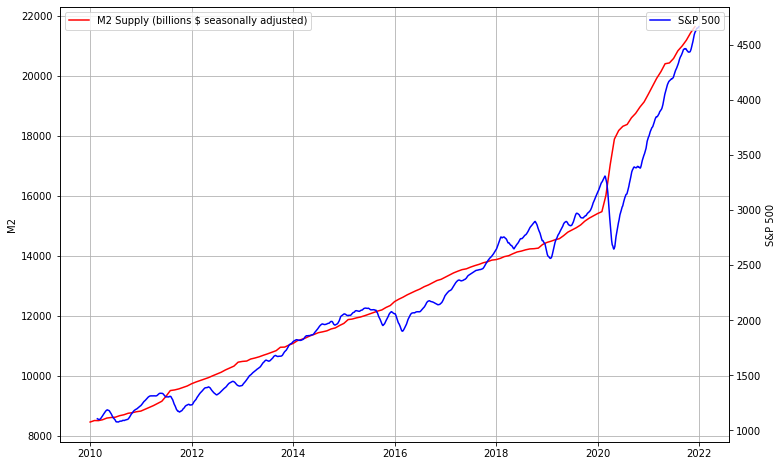

In [65]:
#Plot M2 Supply vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

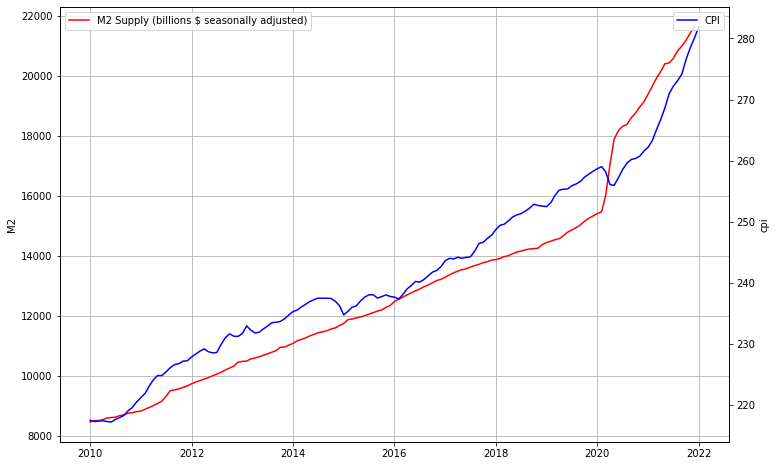

In [29]:
# Plot M2 Supply vs CPI
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(cpi, label ='CPI', color='b')
ax2.set_ylabel('cpi')
ax2.legend(loc='upper right')

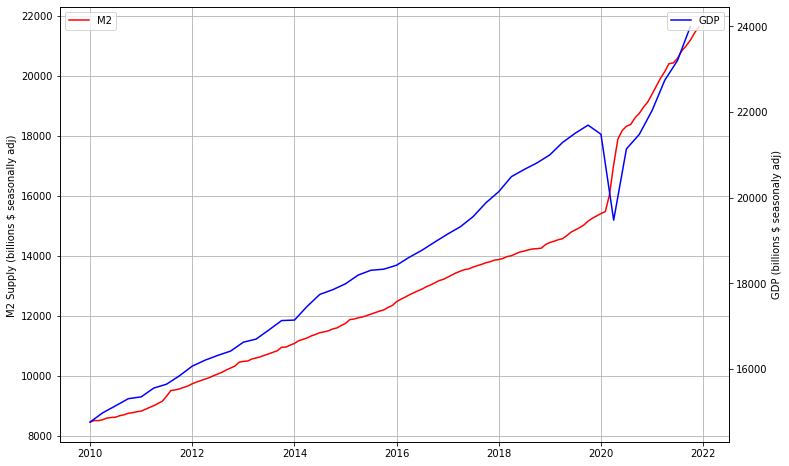

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2', color='r')
ax.set_ylabel('M2 Supply (billions $ seasonally adj) ')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(gdp, label ='GDP', color='b')
ax2.set_ylabel('GDP (billions $ seasonaly adj)')
ax2.legend(loc='upper right')